# K MEAN by

# Andani Madodonga







In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import KMeans
from google.colab import files


In [3]:
#upload the data
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3980 bytes


In [4]:
#read the uploaded Csv file
df = pd.read_csv("Mall_Customers.csv")
#view the portion dataset from the top 
df.head()


CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
#The  descriptive statistic of the data
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


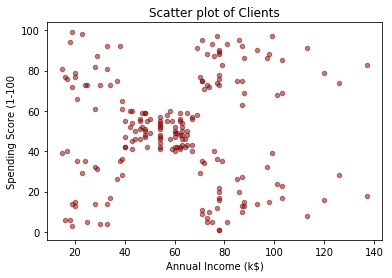

In [6]:
#plot the scatter plot of the data 
colors = (0.5,0,0)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], s=20, c=colors, alpha=0.5)
plt.title('Scatter plot of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


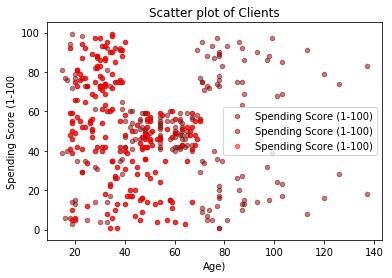

In [7]:

colors = (0.5,0,0)
colors1 = (1,0,0)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], s=20, c=colors, alpha=0.5)
plt.scatter(df["Age"], df["Spending Score (1-100)"], s=20, c=colors, alpha=0.5)

plt.scatter(df["Age"], df["Spending Score (1-100)"], s=20, c=colors1, alpha=0.5)
plt.title('Scatter plot of Clients')

plt.xlabel('Annual Income (k$)')
plt.xlabel('Age)')

plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()


No handles with labels found to put in legend.


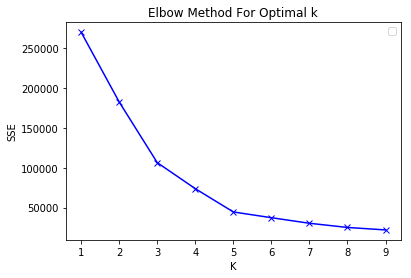

In [8]:
#the elbow method to find the value of K
X=np.array(list(zip(df["Annual Income (k$)"],df["Spending Score (1-100)"]))).reshape(len(df["Annual Income (k$)"]), 2)

           
      
SSE = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)
    
plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.legend()
plt.title('Elbow Method For Optimal k')

plt.show()


In [0]:
#@title The plot above represents the variance within the clusters. SSE decreases as k increases and the optimal K is at the elobow of the graph i.e K =5.This bend indicates that additional clusters beyond the fifth have little value.It basically mean that we going to have 5 clusters 



In [0]:


# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

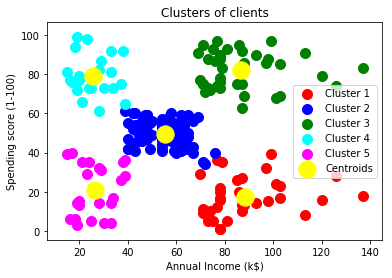

In [11]:


# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

In [1]:
#@title we know that K-means clustering is used to classify observations into k groups, based on their similarity, in this case we have 5 clusters each one of them representing different clients based on their annual income and spending score. 

well done son!!


In [16]:
#result = zip(X , kmeans.labels_)
from sklearn import datasets

#sortedR = sorted(result, key=lambda x: x[1])

mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform the dictionary into list
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)
dictlist


[[0, array([124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154,
         156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
         182, 184, 186, 188, 190, 192, 194, 196, 198])],
 [1, array([ 43,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
          58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
          71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
          97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
         110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
         126, 132, 142])],
 [2, array([123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147,
         149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173,
         175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199])],
 [3, array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         3